In [73]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import numpy as np
import seaborn as sns 
%matplotlib inline

## Read in data
Seperating the attributes from the result

In [74]:
file = pd.read_csv("heart_data.txt")

cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
data = pd.DataFrame([file[col] for col in cols]).T
famhist = [1 if val == 'Present' else 0 for val in file['famhist']]
data['famhist'] = famhist
data = pd.DataFrame(zscore(data, ddof=1))
cols.append('famhist')
data.columns = cols

data_label = pd.DataFrame(file['chd'])

data

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1.184570
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,-0.842361
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,1.184570
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1.184570
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1.184570
...,...,...,...,...,...,...,...,...,...
457,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,-0.842361
458,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,-0.842361
459,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,-0.842361
460,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,-0.842361


In [75]:
#Splitting data Temp
selection = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
X = data[selection]
y = data_label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [79]:
logreg = LogisticRegression(solver='liblinear') #Defining solver
logreg.fit(X_train,y_train) #Modelfitting

pred_y_log = logreg.predict(X_test) 

loss_function_log = nn.MSELoss()

print(loss_function_log)

# loss_test_log = loss_function_log(pred_y_log.flatten(), y_test)
cnf_matrix = metrics.confusion_matrix(y_test, pred_y_log) 

cnf_matrix 


def log_reg(x_train: object, x_test: object, y_train: object, y_test: object):

    logreg = LogisticRegression(solver='liblinear') #Defining solver
    logreg.fit(x_train,y_train) #Modelfitting

    pred_y_log = logreg.predict(x_test) 

    loss_function_log = nn.MSELoss()

    loss_test_log = loss_function_log(pred_y_log.flatten(), y_test)


log_reg(X_train,X_test,y_train,y_test)


MSELoss()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[65, 12],
       [25, 14]])

Text(0.5, 427.9555555555555, 'Predicted label')

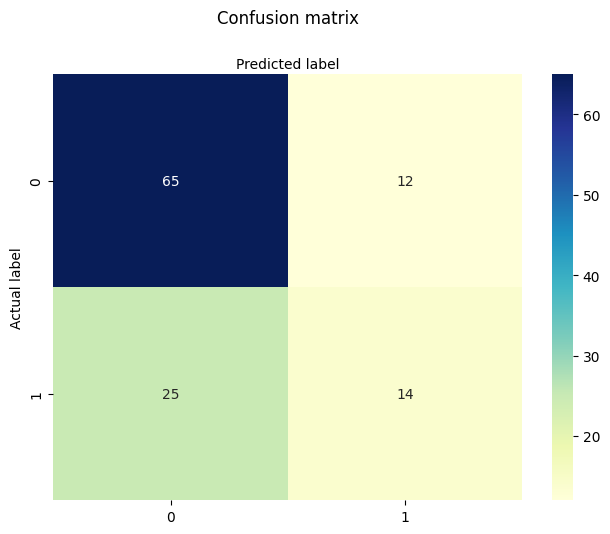

In [77]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

## Log Reg Classification

In [78]:
def log_reg(x_train: object, x_test: object, y_train: object, y_test: object):

    logreg = LogisticRegression(solver='liblinear') #Defining solver
    logreg.fit(x_train,y_train) #Modelfitting

    pred_y_log = logreg.predict(x_test) 

    loss_function_log = nn.MSELoss()

    loss_test_log = loss_function_log(pred_y_log.flatten(), y_test)


log_reg(X_train,X_test,y_train,y_test)



class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: 'numpy.int64' object is not callable

## Data seperation
Seperating the attributes from the result

In [ ]:
def kfold_iterations(x_data: object, y_data: object, epochs: int, hidden_neurons: list, k: int = 10, ):
    
    k_inner = len(hidden_neurons) # Make as many k-folds as there are hidden neurons
    
    best_model = np.zeros(shape=k) # The number of hidden neurons for the best models will be stored here
    
    E_i_NN, final_train_error = np.zeros(shape=k), np.zeros(shape=k) # Error for best model in each k-fold will be stored here
    validation_error = np.zeros(shape=(k_inner, k_inner)) # Error for each inner layer will be stored here
    
    splits_outer = KFold(n_splits = k, shuffle=True, random_state=42) # Defining outer splits
    
    for i, (train_idx_outer, test_idx_outer) in enumerate(splits_outer.split(x_data)): # Outer k-fold layer
        
        # Getting "new" data set for inner k-folds
        x_train_outer = x_data.iloc[train_idx_outer]
        y_train_outer = y_data.iloc[train_idx_outer]
        
        
        splits_inner = KFold(n_splits = k_inner, shuffle=True, random_state=42) # Defining inner splits
        
        for j, (train_idx_inner, test_idx_inner) in enumerate(splits_inner.split(x_train_outer)): # Inner k-fold layer
            
            for jj, h in enumerate(hidden_neurons):
                # Training models on inner k-folds
                _, test_loss = ANN_model(epochs, 
                                        h,
                                        x_train_outer, 
                                        y_train_outer,
                                        train_idx_inner,
                                        test_idx_inner
                                        )
            
                # We're only interested in the last test error, 
                # as this defines the total loss for the given model
                validation_error[j, jj] = test_loss[-1] 
            
                '''
                Put a function here that runs the linear regression or logistic regression
                for inner k-folds and find the best lambda value for each outer k-fold
                '''
        
        length_ratio = len(x_train_outer) / len(x_data)
        generalization_error = [np.sum(length_ratio * np.array(validation_error_s)) for validation_error_s in validation_error]
        
        # Run model again for outer layer with best h-value from inner layers
        h_best = hidden_neurons[np.argmin(generalization_error)]
        train_loss, test_loss = ANN_model(epochs, 
                                 h_best,
                                 x_data, 
                                 y_data,
                                 train_idx_outer,
                                 test_idx_outer
                                )
        
        '''
        Again put the linear or logistic regression model here 
        but this time evaluate on the outer k-fold
        '''
        
        best_model[i] = h_best
        E_i_NN[i] = test_loss[-1] # Appending last value for test loss in outer layer, this value will go in the final table
        final_train_error[i] = train_loss[-1]
    
    return final_train_error, E_i_NN, best_model